# <center> Taxi Fare Prediction

- Abstract: 

In the last few years, the number of for-hire vehicles operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess.

- Problem Statement: 
    
Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

- Dataset Information:

unique_id:  A unique identifier or key for each record in the dataset

date_time_of_pickup:  The time when the ride started 

longitude_of_pickup:  Longitude of the taxi ride pickup point 

latitude_of_pickup:  Latitude of the taxi ride pickup point 

longitude__of_dropoff:  Longitude of the taxi ride dropoff point 

latitude_of_dropoff:  Latitude of the taxi ride dropoff point 

no_of_passenger:  count of the passengers during the ride 

amount:  (target variable)dollar amount of the cost of the taxi ride

- Scope: 

● Prepare and analyse data ● Perform feature engineering wherever applicable ● Check the distribution of key numerical variables ● Training a Random Forest model with data and check it’s performance ● Perform hyperparameter tuning

##  *Getting Data*

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pylab as pl
#pd.set_option('Display.max_rows',None)

In [2]:
# Getting data using pandas
taxi = pd.read_csv('TaxiFare.csv')

In [3]:
# Dimensions of dataframe
taxi.shape

(50000, 8)

In [4]:
# Elements in dataframe
taxi.size

400000

In [5]:
taxi.head()

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
0,31:49.0,2009-01-01 01:31:49 UTC,-73.994192,40.720077,-73.993356,40.742642,1,8.6
1,05:37.0,2009-01-01 02:05:37 UTC,-73.978433,40.744781,-74.004713,40.734328,1,11.0
2,07:49.0,2009-01-01 02:07:49 UTC,-73.984291,40.667851,-74.006015,40.735481,3,17.8
3,51:52.0,2009-01-01 02:51:52 UTC,-73.956172,40.771965,-73.991027,40.751035,2,10.2
4,31:36.0,2009-01-01 03:31:36 UTC,-73.980325,40.734579,-74.014711,40.717868,3,15.4


In [6]:
taxi.tail()

,unique_id,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
49995,59:31.0,2015-06-30 17:59:31 UTC,-73.932999,40.758709,-73.939651,40.751801,1,8.5
49996,14:39.0,2015-06-30 19:14:39 UTC,-73.982880,40.758121,-73.962357,40.770641,1,10.5
49997,42:23.0,2015-06-30 19:42:23 UTC,-73.991592,40.731472,-73.985100,40.723923,1,6.0
49998,50:04.0,2015-06-30 20:50:04 UTC,-73.979858,40.786270,-73.982391,40.771381,5,8.5
49999,42:39.0,2015-06-30 22:42:39 UTC,-73.997223,40.726227,-73.978622,40.734432,1,9.0


In [7]:
# Summary of Dataframe
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
 7   amount                50000 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [8]:
# Changing datatype of 'date_time_of_pickup' to date_time
taxi.date_time_of_pickup = pd.to_datetime(taxi.date_time_of_pickup)

In [9]:
# Checking statistical summary 
taxi.describe()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-72.509756,39.933759,-72.504616,39.926251,1.667840,11.364171
std,10.393860,6.224857,10.407570,6.014737,1.289195,9.685557
min,-75.423848,-74.006893,-84.654241,-74.006377,0.000000,-5.000000
25%,-73.992062,40.734880,-73.991152,40.734372,1.000000,6.000000
50%,-73.981840,40.752678,-73.980082,40.753372,1.000000,8.500000
75%,-73.967148,40.767360,-73.963584,40.768167,2.000000,12.500000
max,40.783472,401.083332,40.851027,43.415190,6.000000,200.000000


In [10]:
# Checking missing values
taxi.isnull().sum()

unique_id               0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64

In [11]:
# Checking not available values
taxi.isna().sum()

unique_id               0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
amount                  0
dtype: int64

In [12]:
# Checking duplicates
taxi.duplicated().any()

False

In [19]:
# In this dataset we have some incorrect coordinates 
# lines of longitude have X-coordinates between -180 and +180 degrees and lines of latitudes have Y-values that are between
#-90 and +90 degrees.
incorrect_coordinates = taxi.loc[(taxi.latitude_of_pickup > 90) |(taxi.latitude_of_pickup < -90) |
                                   (taxi.latitude_of_dropoff > 90) |(taxi.latitude_of_dropoff < -90) |
                                   (taxi.longitude_of_pickup > 180) |(taxi.longitude_of_pickup < -180) |
                                   (taxi.longitude_of_dropoff > 90) |(taxi.longitude_of_dropoff < -90)
                                    ].index

taxi.drop(incorrect_coordinates, inplace = True)     # Removing those indexes

In [24]:
# Extracting day, month, year and hour data from 'date_time_of_pickup'
taxi['month'] = taxi['date_time_of_pickup'].dt.month
taxi['year'] = taxi['date_time_of_pickup'].dt.year
taxi['day'] = taxi['date_time_of_pickup'].dt.day
taxi['hour'] = taxi['date_time_of_pickup'].dt.hour

In [25]:
# Extracing day of week from date_time_of_pickup and creating new binary feature for recognizing weekend
taxi['day_of_week'] = taxi['date_time_of_pickup'].dt.dayofweek
taxi['is_weekend'] = taxi['date_time_of_pickup'].dt.weekday // 5 == 1

In [26]:
# Categorical encoding of 'is_weekend' feature
taxi.is_weekend = taxi.is_weekend.map({False:0,True:1})

In [27]:
# Changing datatype
taxi.is_weekend = taxi.is_weekend.astype('category')
taxi.month = taxi.month.astype('category')
taxi.day_of_week = taxi.day_of_week.astype('category')

In [28]:
# Taxi fare cannot be negative so removing those instances
taxi.drop(taxi[taxi.amount < 0].index, inplace=True)

In [29]:
# taxi fare cannot be zero so removing those records
taxi.drop(taxi[taxi.amount == 0].index, inplace=True)

In [30]:
# Number of passengers in taxi cannot be zero
taxi.drop(taxi[taxi.no_of_passenger == 0].index, inplace=True)

- This dataset has now total 10 Independant variables and 'amount' is our target variable.
- This dataset contains records of taxi fare of total 7 years (2009-2015).
- Amount varies from 0 to 200 and max number of passengers is six.

## *Exploratory Data Analysis*

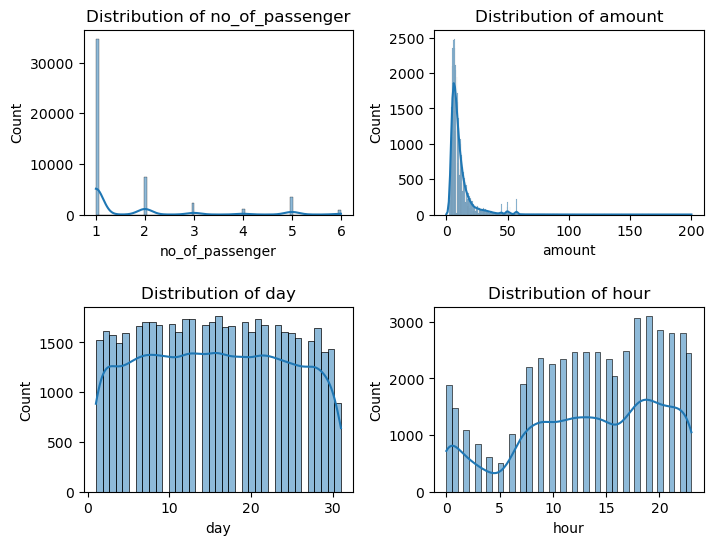

In [37]:
# Distribution of continuous variables

plt.figure(1,figsize=(8,6))
plt.subplot(2,2,1)
sns.histplot(x=taxi.no_of_passenger, kde=True)
plt.title('Distribution of no_of_passenger')

plt.subplot(2,2,2)
sns.histplot(x=taxi.amount, kde=True)
plt.title('Distribution of amount')

plt.subplot(2,2,3)
sns.histplot(x=taxi.day, kde=True)
plt.title('Distribution of day')

plt.subplot(2,2,4)
sns.histplot(x=taxi.hour, kde=True)
plt.title('Distribution of hour')

pl.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

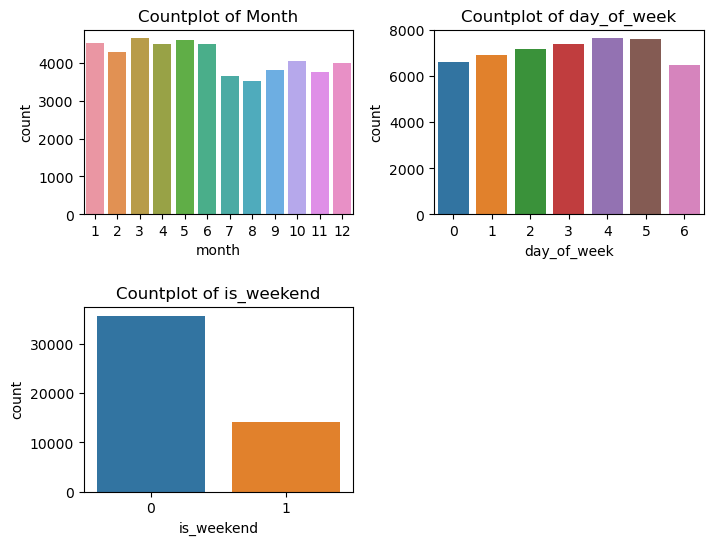

In [38]:
# Countplot of variables
plt.figure(1, figsize=(8,6))

plt.subplot(2,2,1)
sns.countplot(x=taxi.month)
plt.title('Countplot of Month')

plt.subplot(2,2,2)
sns.countplot(x=taxi.day_of_week)
plt.title('Countplot of day_of_week')

plt.subplot(2,2,3)
sns.countplot(x=taxi.is_weekend)
plt.title('Countplot of is_weekend')

pl.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

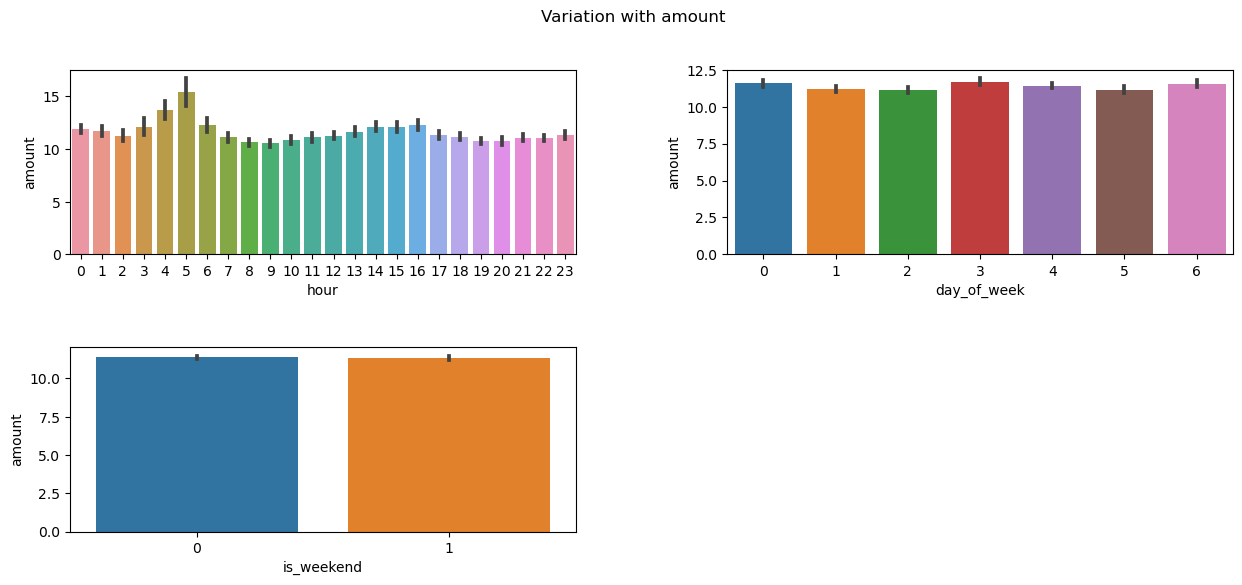

In [39]:
# Barplot of features

plt.figure(1, figsize=(15,6))

plt.subplot(2,2,1)
sns.barplot(x=taxi.hour, y=taxi.amount)

plt.subplot(2,2,2)
sns.barplot(x=taxi.day_of_week, y=taxi.amount)

plt.subplot(2,2,3)
sns.barplot(x=taxi.is_weekend, y=taxi.amount)

pl.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle('Variation with amount')
plt.show()

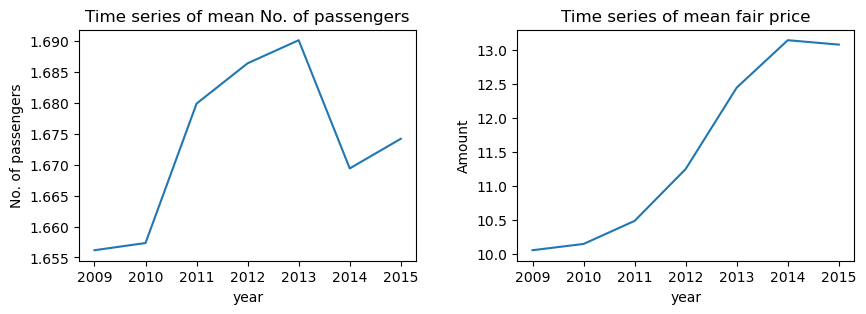

In [40]:
# Time series plot

plt.figure(2,figsize=(10,3))
plt.subplot(1,2,1)
e = pd.crosstab(index=taxi.day_of_week, columns=taxi.year, values=taxi.no_of_passenger, aggfunc='mean', margins=True)

sns.lineplot(e.iloc[-1,:-1])
plt.ylabel('No. of passengers')
plt.title('Time series of mean No. of passengers')

plt.subplot(1,2,2)
d = pd.crosstab(index=taxi.day_of_week, columns=taxi.year, values=taxi.amount, aggfunc='mean', margins=True)

sns.lineplot(d.iloc[-1,:-1])
plt.ylabel('Amount')
plt.title('Time series of mean fair price')
pl.subplots_adjust(wspace=0.3)
plt.show()

<Axes: >

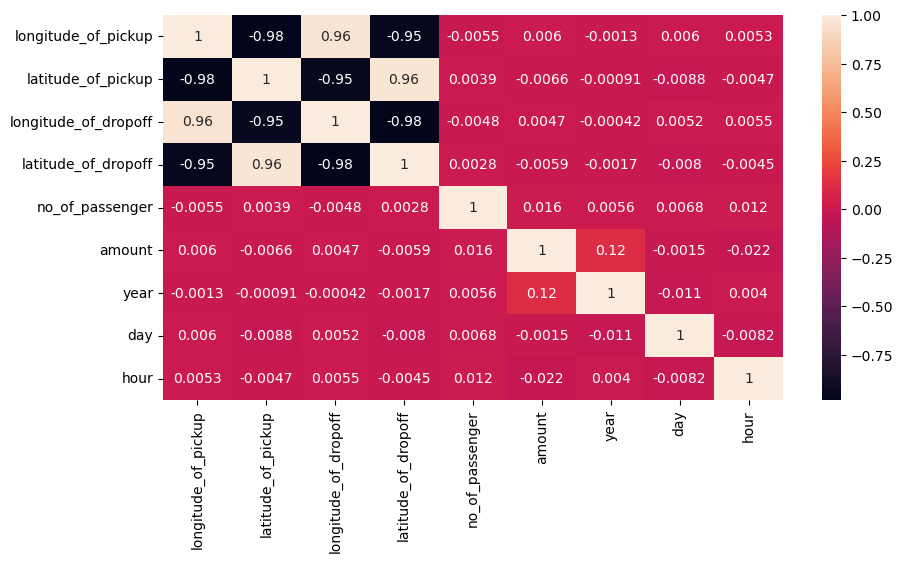

In [41]:
plt.figure(1, figsize=(10,5))
sns.heatmap(taxi.corr(), annot=True)

- Maximum fare amount is 200 but number of fares is higher between the amount range of 0-25.
- From distribution of the hour it is clear that no. of passengers are less during midnight to morning but at the same time fares are higher.
- Number of average passengers are increased from 2009 to 2013 but after 2013 it is showing slight decline.
- Looking at mean fare from 2003 to 2015 we can see increasing trend.

## *Feature selection*

In [42]:
# Splitting data
x = taxi.drop(['unique_id', 'date_time_of_pickup','amount','year'], axis=1)
y = taxi['amount']

In [43]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, RFECV, mutual_info_regression, f_regression, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [44]:
# Feature selection using SelectKBest with mutual_info
select = SelectKBest(mutual_info_regression, k='all')
select.fit(x,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001F297A5ADD0>)

In [45]:
feature_importance = pd.DataFrame({'Features':x.columns, 'SelectKBest.score_':select.scores_})
feature_importance.sort_values('SelectKBest.score_', ascending=False)

,Features,SelectKBest.score_
2,longitude_of_dropoff,0.112207
3,latitude_of_dropoff,0.106558
0,longitude_of_pickup,0.093050
1,latitude_of_pickup,0.078261
5,month,0.010136
7,hour,0.010062
4,no_of_passenger,0.005663
8,day_of_week,0.000595
6,day,0.000000
9,is_weekend,0.000000


In [46]:
# Feature Selection using Random Forest

rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [47]:
feature_importance['RF.feature_importances_'] = rf.feature_importances_
feature_importance.sort_values('RF.feature_importances_', ascending=False)

,Features,SelectKBest.score_,RF.feature_importances_
2,longitude_of_dropoff,0.112207,0.388413
0,longitude_of_pickup,0.093050,0.241340
3,latitude_of_dropoff,0.106558,0.159765
1,latitude_of_pickup,0.078261,0.125240
7,hour,0.010062,0.022727
6,day,0.000000,0.022250
5,month,0.010136,0.018383
8,day_of_week,0.000595,0.012271
4,no_of_passenger,0.005663,0.007595
9,is_weekend,0.000000,0.002017


In [48]:
# Feature Selection using Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [49]:
feature_importance['DT.feature_importances_'] = dt.feature_importances_
feature_importance.sort_values('DT.feature_importances_', ascending=False)

,Features,SelectKBest.score_,RF.feature_importances_,DT.feature_importances_
2,longitude_of_dropoff,0.112207,0.388413,0.401106
0,longitude_of_pickup,0.093050,0.241340,0.218082
3,latitude_of_dropoff,0.106558,0.159765,0.156156
1,latitude_of_pickup,0.078261,0.125240,0.136825
7,hour,0.010062,0.022727,0.020414
6,day,0.000000,0.022250,0.019898
5,month,0.010136,0.018383,0.019584
8,day_of_week,0.000595,0.012271,0.014293
4,no_of_passenger,0.005663,0.007595,0.011747
9,is_weekend,0.000000,0.002017,0.001894


In [50]:
# Feature selection using RFECV

from sklearn.model_selection import KFold

min_features_to_select = 1
df = DecisionTreeRegressor()
cv = KFold(5)

rfecv = RFECV(estimator=dt,
             cv=cv,
             scoring='r2',
             min_features_to_select=min_features_to_select)

rfecv.fit(x,y)

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeRegressor(), scoring='r2')

In [51]:
feature_importance['RFE_support'] = rfecv.get_support()
feature_importance.sort_values('RFE_support', ascending=False)

,Features,SelectKBest.score_,RF.feature_importances_,DT.feature_importances_,RFE_support
0,longitude_of_pickup,0.093050,0.241340,0.218082,True
1,latitude_of_pickup,0.078261,0.125240,0.136825,True
2,longitude_of_dropoff,0.112207,0.388413,0.401106,True
3,latitude_of_dropoff,0.106558,0.159765,0.156156,True
4,no_of_passenger,0.005663,0.007595,0.011747,False
5,month,0.010136,0.018383,0.019584,False
6,day,0.000000,0.022250,0.019898,False
7,hour,0.010062,0.022727,0.020414,False
8,day_of_week,0.000595,0.012271,0.014293,False
9,is_weekend,0.000000,0.002017,0.001894,False


In [52]:
# Feature selection using varience threshold

varience = VarianceThreshold(threshold=2)
varience.fit(x,y)

VarianceThreshold(threshold=2)

In [53]:
feature_importance['varience_support'] = varience.get_support()
feature_importance.sort_values('varience_support', ascending=False)

,Features,SelectKBest.score_,RF.feature_importances_,DT.feature_importances_,RFE_support,varience_support
0,longitude_of_pickup,0.093050,0.241340,0.218082,True,True
1,latitude_of_pickup,0.078261,0.125240,0.136825,True,True
2,longitude_of_dropoff,0.112207,0.388413,0.401106,True,True
3,latitude_of_dropoff,0.106558,0.159765,0.156156,True,True
5,month,0.010136,0.018383,0.019584,False,True
6,day,0.000000,0.022250,0.019898,False,True
7,hour,0.010062,0.022727,0.020414,False,True
8,day_of_week,0.000595,0.012271,0.014293,False,True
4,no_of_passenger,0.005663,0.007595,0.011747,False,False
9,is_weekend,0.000000,0.002017,0.001894,False,False


- Longitude, latitude, hour, month, no_of_passenger and day_of_week, day are found to be most important features for predicting taxi fare.
- while is_weekend is least important.

In [68]:
# Train test split using only important features
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x.drop('is_weekend',axis=1), y, test_size=0.3, random_state=42)

print('train_x: ',train_x.shape)
print('train_y: ',train_y.shape)
print('test_x: ',test_x.shape)
print('test_y: ',test_y.shape)

train_x:  (34877, 9)
train_y:  (34877,)
test_x:  (14948, 9)
test_y:  (14948,)


## *Model Building*

In [69]:
# This is a regression problem but we cannot use Linear Regression, Support vector machines and K nearest neigbhor because 
# we have high multicollinearity in data and we have also not worked on outliers removal.
# In dataset we have location points marked by latitude and longitude we need to preserve its spacial integrity 
# for better performance of model.

#### Model 1: Decision Tree 

In [89]:
# Building Decision tree model with Grid search CV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold, GridSearchCV

#'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
folds = KFold(n_splits=3, shuffle=True, random_state=55)

param = {'max_depth': [None, 4, 5, 7],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
         'max_features': ['auto', 'sqrt', 'log2', None]}
                      

dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dt,
                      cv=folds,
                      param_grid=param,
                      scoring='neg_mean_squared_error',
                      verbose=1)

dt_grid.fit(train_x, train_y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=55, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 4, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [90]:
# Best parameters
dt_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [91]:
dt = DecisionTreeRegressor(max_depth=dt_grid.best_params_.get('max_depth'), 
                           max_features=dt_grid.best_params_.get('max_features'),
                           min_samples_leaf=dt_grid.best_params_.get('min_samples_leaf'), 
                           min_samples_split=dt_grid.best_params_.get('min_samples_split'))
dt.fit(train_x, train_y)

print('train score is %.2f'%dt.score(train_x, train_y))
print('test score is %.2f'%dt.score(test_x, test_y))

dt_pred = dt.predict(test_x)

print('r2 score is %.2f'%r2_score(test_y, dt_pred))
print('MAE score is %.2f'%mean_absolute_error(test_y, dt_pred))
print('MSE score is %.2f'%mean_squared_error(test_y, dt_pred))
print('RMSE score is %.2f'%np.sqrt(mean_squared_error(test_y, dt_pred)))
print('MAPE score is %.2f'%mean_absolute_percentage_error(test_y, dt_pred))

train score is 0.88
test score is 0.63
r2 score is 0.63
MAE score is 2.97
MSE score is 34.58
RMSE score is 5.88
MAPE score is 0.30


- Training score is more than testing score so model is overfitting.
- RMSE is 5.88.

#### Model 2: Bagging 

In [95]:
# Building Bagging Regression model with Grid search CV
from sklearn.ensemble import BaggingRegressor

folds = KFold(n_splits=3, shuffle=True, random_state=0)

param = {'n_estimators':[10,20,30],
          'max_samples':[0.2,0.5,1.0],
          'max_features':[0.5,0.7,1]}

br = BaggingRegressor()
br_grid = GridSearchCV(estimator=br,
                      cv=folds,
                      param_grid=param,
                      scoring='neg_mean_squared_error',
                      verbose=1)

br_grid.fit(train_x, train_y)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=BaggingRegressor(),
             param_grid={'max_features': [0.5, 0.7, 1],
                         'max_samples': [0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [96]:
# Best parameters
br_grid.best_params_

{'max_features': 0.7, 'max_samples': 0.5, 'n_estimators': 30}

In [97]:
br = BaggingRegressor(n_estimators=br_grid.best_params_.get('n_estimators'),
                      max_features=br_grid.best_params_.get('max_features'),
                      max_samples=br_grid.best_params_.get('max_samples'))

br.fit(train_x, train_y)

print('train score is %.2f'%br.score(train_x, train_y))
print('test score is %.2f'%br.score(test_x, test_y))

br_pred = br.predict(test_x)

print('r2 score is %.2f'%r2_score(test_y, br_pred))
print('MAE score is %.2f'%mean_absolute_error(test_y, br_pred))
print('MSE score is %.2f'%mean_squared_error(test_y, br_pred))
print('RMSE score is %.2f'%np.sqrt(mean_squared_error(test_y, br_pred)))
print('MAPE score is %.2f'%mean_absolute_percentage_error(test_y, br_pred))

train score is 0.87
test score is 0.65
r2 score is 0.65
MAE score is 3.27
MSE score is 32.63
RMSE score is 5.71
MAPE score is 0.38


- In Bagging regression model we are getting training score as 0.87 and testing score as 0.65 which shows overfitting.
- But RMSE is 5.71 which is less than Decision tree model hence model is better.

#### Model 3: Extra Tree 

In [99]:
# Building Extra Tree Regression model with Grid search CV
from sklearn.ensemble import ExtraTreesRegressor

folds = KFold(n_splits=3, shuffle=True, random_state=0)

param = {'max_depth':[None,4,6,8],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,3,6],
         'max_features':['sqrt','log2','None']}
                      
et = ExtraTreesRegressor()
et_grid = GridSearchCV(estimator=et,
                      cv=folds,
                      param_grid=param,
                      scoring='neg_mean_squared_error',
                      verbose=1)

et_grid.fit(train_x, train_y)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 4, 6, 8],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3, 6],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error', verbose=1)

In [101]:
# Best parameters
et_grid.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [103]:
#Building model on best parameters
et = ExtraTreesRegressor(max_depth=et_grid.best_params_.get('max_depth'),
                         max_features=et_grid.best_params_.get('max_features'),
                         min_samples_leaf=et_grid.best_params_.get('min_samples_leaf'),
                         min_samples_split=et_grid.best_params_.get('min_samples_split'))

et.fit(train_x, train_y)

print('train score is %.2f'%et.score(train_x, train_y))
print('test score is %.2f'%et.score(test_x, test_y))

et_pred = et.predict(test_x)

print('r2 score is %.2f'%r2_score(test_y, et_pred))
print('MAE score is %.2f'%mean_absolute_error(test_y, et_pred))
print('MSE score is %.2f'%mean_squared_error(test_y, et_pred))
print('RMSE score is %.2f'%np.sqrt(mean_squared_error(test_y, et_pred)))
print('MAPE score is %.2f'%mean_absolute_percentage_error(test_y, et_pred))

train score is 1.00
test score is 0.65
r2 score is 0.65
MAE score is 3.21
MSE score is 33.37
RMSE score is 5.78
MAPE score is 0.36


- Extra Tree model is also overfitting as training score is more than test score.

#### Model 4: Random Forest

In [105]:
# Building Random Forest Regression model with Grid search CV
from sklearn.ensemble import RandomForestRegressor

folds = KFold(n_splits=3, shuffle=True, random_state=0)

#'n_estimators':[50,70,100],
#'max_features':['sqrt','log2','auto']

param = {'max_depth':[None,4,6,8],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,2,3]}
                      
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf,
                      cv=folds,
                      param_grid=param,
                      scoring='neg_mean_squared_error',
                      verbose=1)

rf_grid.fit(train_x, train_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error', verbose=1)

In [106]:
# Best parameters
rf_grid.best_params_

{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [109]:
rf = RandomForestRegressor(max_depth=rf_grid.best_params_.get('max_depth'),
                           #max_features=rf_grid.best_params_.get('max_features'),
                           min_samples_leaf=rf_grid.best_params_.get('min_samples_leaf'),
                           min_samples_split=rf_grid.best_params_.get('min_samples_split'))
                           #n_estimators=rf_grid.best_params_.get('n_estimators')

rf.fit(train_x, train_y)

print('train score is %.2f'%rf.score(train_x, train_y))
print('test score is %.2f'%rf.score(test_x, test_y))

rf_pred = rf.predict(test_x)

print('r2 score is %.2f'%r2_score(test_y, rf_pred))
print('MAE score is %.2f'%mean_absolute_error(test_y, rf_pred))
print('MSE score is %.2f'%mean_squared_error(test_y, rf_pred))
print('RMSE score is %.2f'%np.sqrt(mean_squared_error(test_y, rf_pred)))
print('MAPE score is %.2f'%mean_absolute_percentage_error(test_y, rf_pred))

train score is 0.90
test score is 0.73
r2 score is 0.73
MAE score is 2.32
MSE score is 25.34
RMSE score is 5.03
MAPE score is 0.24


- In Random Forest model our training score (0.90) is more than testing score (0.73) which shows overfitting.
- But here Root Mean Squared Error is 5.03 which is lowest in all above models.

In [111]:
results = pd.DataFrame({'model':['model:1(Decision Tree)','model:2(Bagging Regressor)','model:3(Extra Tree Regressor)','model:4(Random Forest Regressor)'],
                      'train_score':[0.88,0.87,1,0.90],
                      'test_score':[0.63,0.65,0.65,0.73],
                      'r2_score':[0.63,0.65,0.65,0.73],
                      'Mean Absolute Error':[2.97,3.27,3.21,2.32],
                      'Mean Squared Error':[34.58,32.63,33.37,25.34],
                      'Root Mean Squared Error':[5.88,5.71,5.78,5.03],
                      'Mean Absolute Percentage Error':[0.30,0.38,0.36,0.24]})

### Result and Conclusion

In [112]:
results

,model,train_score,test_score,r2_score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,model:1(Decision Tree),0.88,0.63,0.63,2.97,34.58,5.88,0.30
1,model:2(Bagging Regressor),0.87,0.65,0.65,3.27,32.63,5.71,0.38
2,model:3(Extra Tree Regressor),1.00,0.65,0.65,3.21,33.37,5.78,0.36
3,model:4(Random Forest Regressor),0.90,0.73,0.73,2.32,25.34,5.03,0.24


- In this dataset data related to pickup and dropoff points are given along with no. of passengers and time.
- Our aim was to predict taxi fare, In dataset amount is our target variable.   
- Dataset contained some wrong entries related to longitude, latitude and no. of passengers.
- Feature engineering is performed on date_time_of_pickup to extract meaningfull information like month, day_of_week, is_weekend, day and year.
- After performing feature selection is_weekend found to be least important.
- Total 4 regression models are created. (Decision Tree, Bagging Regressor, Extra Tree Regressor and Random Forest Regressor).
- Based on above result matrix we can say all the models are suffering from overfitting.
- But erors are less for random Forest model(model 4), Coefficient of determination for Random Forest is 0.73 
- Random Forest is performing better than other models.